In [ ]:
import kagglehub
import shutil
import os

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")
print("Path to dataset files:", path)

# Copy files to current folder
for filename in os.listdir(path):
    src = os.path.join(path, filename)
    dst = os.path.join(".", filename)
    if os.path.isfile(src):
        shutil.copy2(src, dst)
        print(f"Copied {filename} to current folder")


# Alternative dataset source
import urllib.request

# Download the alternative dataset
url = "https://raw.githubusercontent.com/ZiHG/Customer-churn-prediction/master/Data.csv"
filename = "Data.csv"

try:
    urllib.request.urlretrieve(url, filename)
    print(f"Downloaded {filename} from GitHub repository")
except Exception as e:
    print(f"Error downloading from GitHub: {e}")



# Download another alternative dataset
url2 = "https://raw.githubusercontent.com/DionysiosZelios/Predicting-Customer-Churn/refs/heads/master/Churn_simple_approach.csv"
filename2 = "Churn_simple_approach.csv"

try:
    urllib.request.urlretrieve(url2, filename2)
    print(f"Downloaded {filename2} from GitHub repository")
except Exception as e:
    print(f"Error downloading from GitHub: {e}")


Path to dataset files: /home/dustinvan/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1
Copied WA_Fn-UseC_-Telco-Customer-Churn.csv to current folder
Downloaded Data.csv from GitHub repository
Downloaded Churn_simple_approach.csv from GitHub repository


## Explore data

In [8]:
import pandas as pd

# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.head()
df.info()


# df = pd.read_csv('Data.csv')
# df.head()
# df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Count plot for churn distribution


In [ ]:
# Investigate all elements within each feature
print("Dataset shape:", df.shape)
print("\n" + "="*50)

print("\nUnique values in each column:")
for col in df.columns:
    print(f"\n{col}:")    
    # Show unique values for categorical columns or columns with few unique values
    if df[col].nunique() <= 20:
        print(f"  - Unique values: {sorted(df[col].unique())}")
    else:
        print(f"  - The number of unique value for features: {df[col].unique().size}")

df.isnull().sum()
df.info()

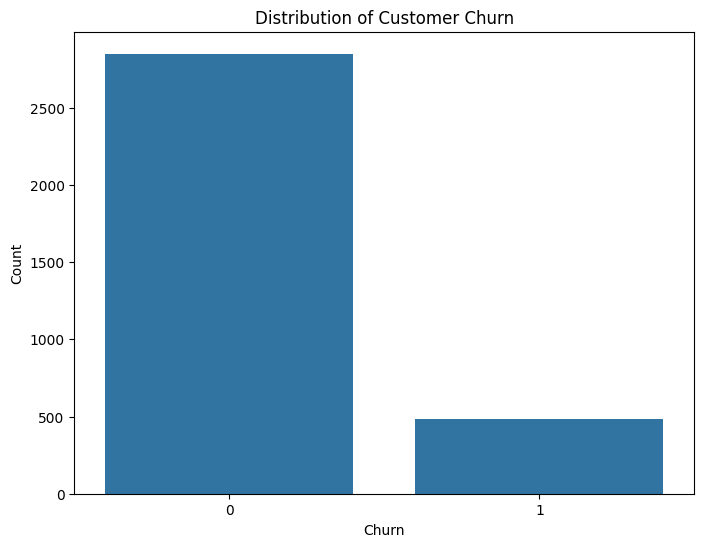

In [86]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Churn')
plt.title('Distribution of Customer Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


<Figure size 1200x1000 with 0 Axes>

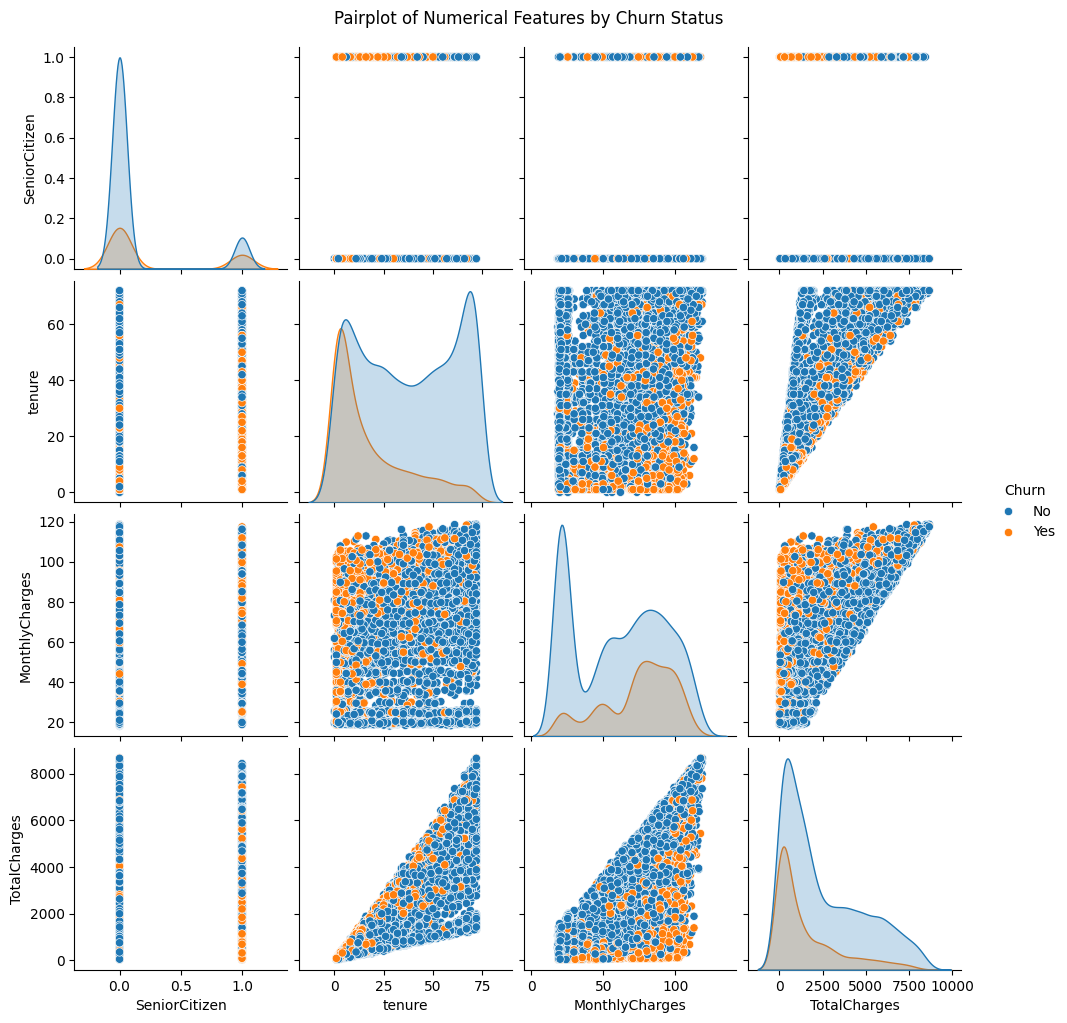

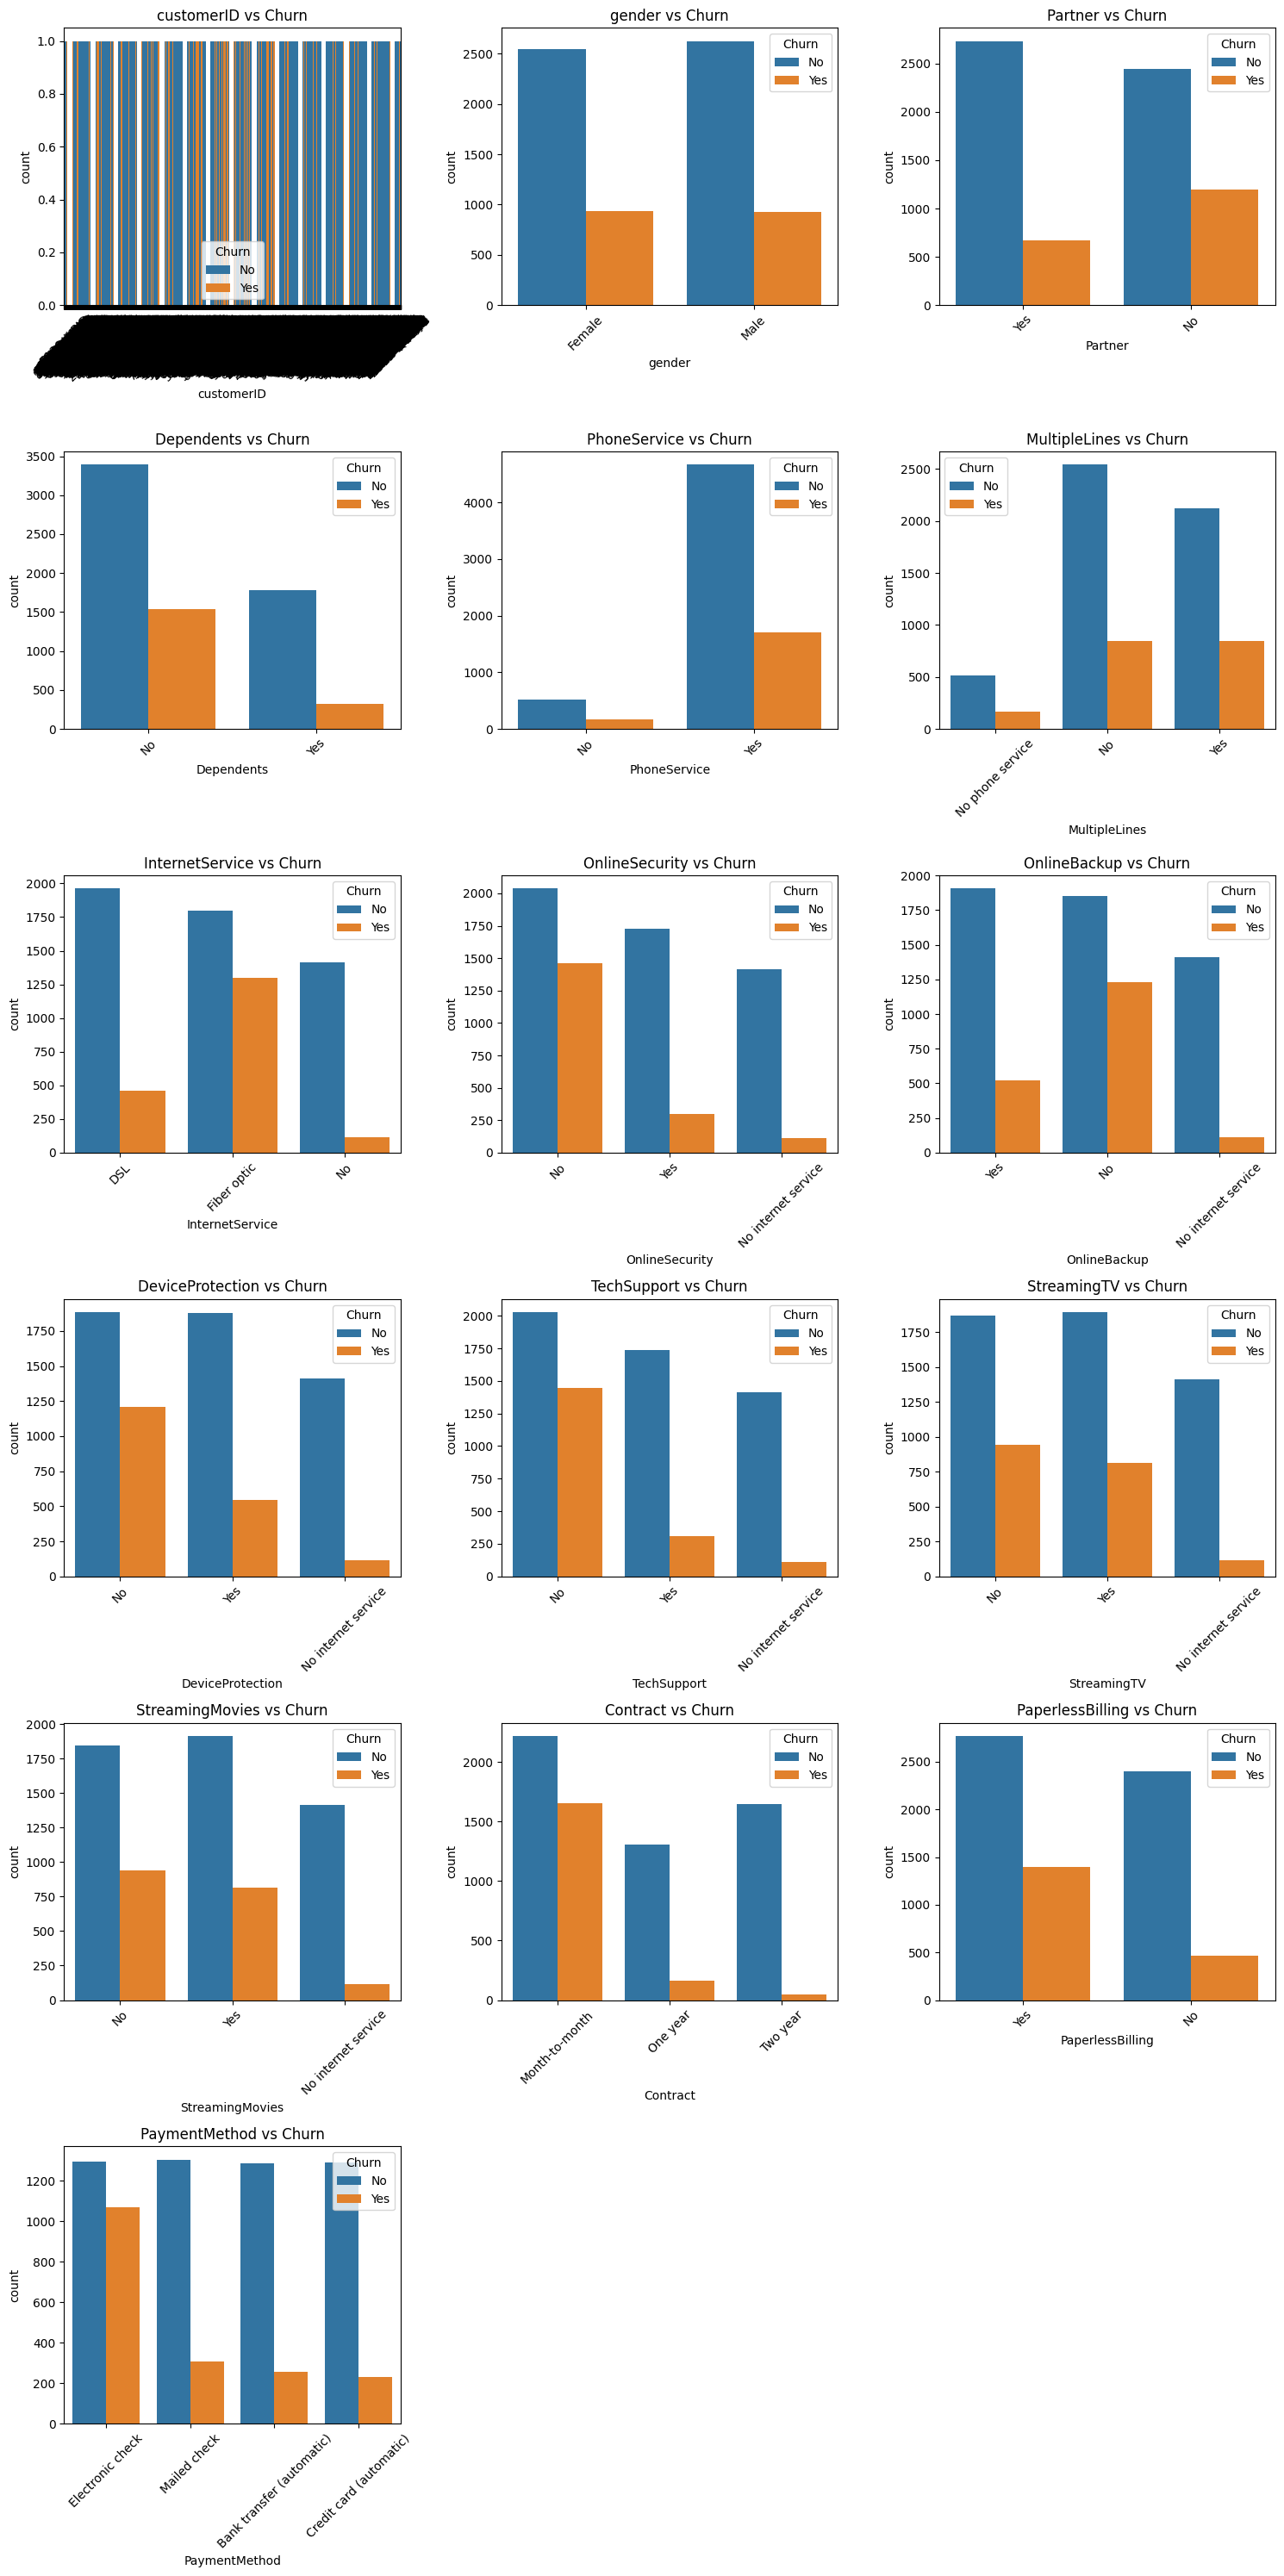

In [41]:
# Pairplot to explore relationships between numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

plt.figure(figsize=(12, 10))
sns.pairplot(data=df[numerical_cols + ['Churn']], hue='Churn')
plt.suptitle('Pairplot of Numerical Features by Churn Status', y=1.02)
plt.show()

# Count plots for categorical features vs Churn
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('Churn')  # Remove target variable from the list

# Calculate grid dimensions
n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(15, 5 * n_rows))

for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)
    plt.legend(title='Churn')

plt.tight_layout()
plt.show()



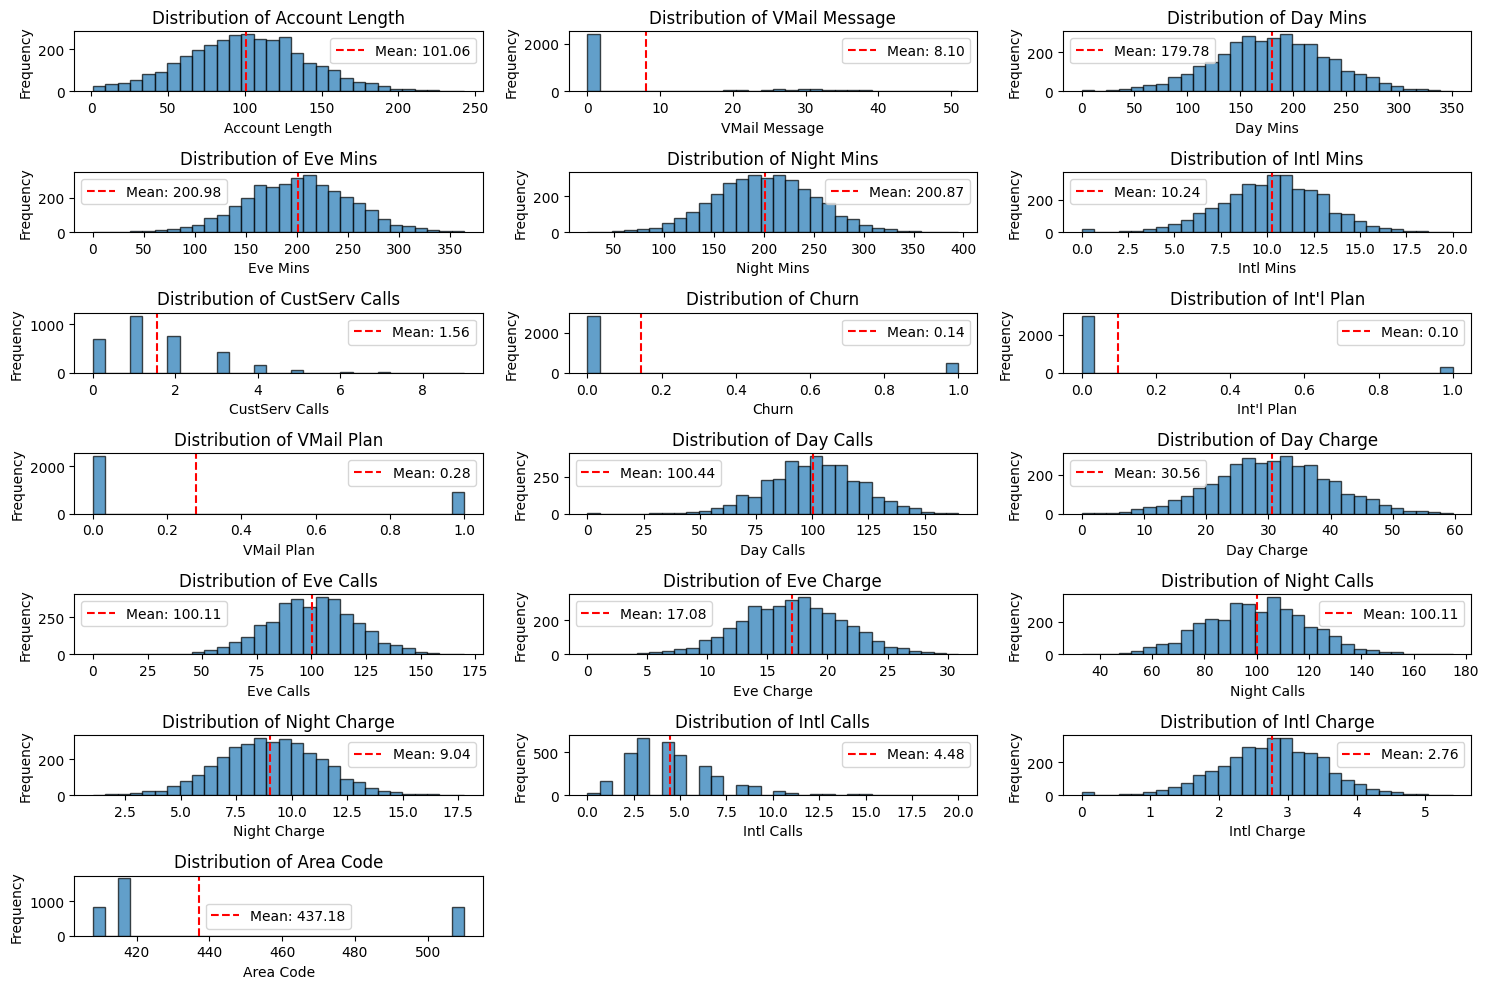

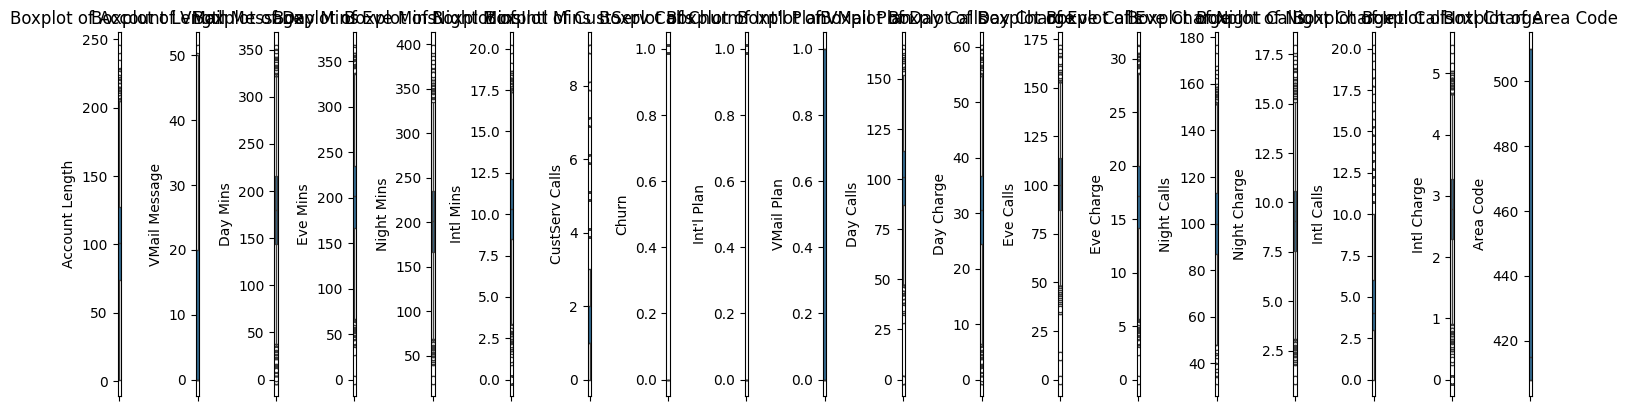

Summary Statistics for Numerical Features:
       Account Length  VMail Message     Day Mins     Eve Mins   Night Mins  \
count     3333.000000    3333.000000  3333.000000  3333.000000  3333.000000   
mean       101.064806       8.099010   179.775098   200.980348   200.872037   
std         39.822106      13.688365    54.467389    50.713844    50.573847   
min          1.000000       0.000000     0.000000     0.000000    23.200000   
25%         74.000000       0.000000   143.700000   166.600000   167.000000   
50%        101.000000       0.000000   179.400000   201.400000   201.200000   
75%        127.000000      20.000000   216.400000   235.300000   235.300000   
max        243.000000      51.000000   350.800000   363.700000   395.000000   

         Intl Mins  CustServ Calls        Churn   Int'l Plan   VMail Plan  \
count  3333.000000     3333.000000  3333.000000  3333.000000  3333.000000   
mean     10.237294        1.562856     0.144914     0.096910     0.276628   
std       2.79

In [85]:
# Distribution analysis of numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create histograms for all numerical features
plt.figure(figsize=(15, 10))
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.hist(df[col], bins=30, alpha=0.7, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    # Add basic statistics as text
    mean_val = df[col].mean()
    std_val = df[col].std()
    plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    plt.legend()

plt.tight_layout()
plt.show()

# Box plots to identify outliers
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, len(numerical_cols), i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

# Summary statistics
print("Summary Statistics for Numerical Features:")
print("=" * 50)
print(df[numerical_cols].describe())

# Check for skewness
print("\nSkewness of Numerical Features:")
print("=" * 35)
for col in numerical_cols:
    skewness = df[col].skew()
    print(f"{col}: {skewness:.3f}")
    


## Process Data

In [10]:
# Convert categorical variables to numeric representation
print("Converting categorical variables to numeric representation...")
print("=" * 55)

# Remove Phone feature as it's not useful for prediction (unique identifier)
if 'Phone' in df.columns:
    df = df.drop('Phone', axis=1)
    print("Removed 'Phone' column as it's a unique identifier not useful for prediction")
    print(f"Dataset shape after removing Phone: {df.shape}")
    print()


# Get categorical columns (excluding customerID which is just an identifier)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
if 'customerID' in categorical_cols:
    categorical_cols.remove('customerID')

print(f"Categorical columns to convert: {categorical_cols}")
print()

# Create a copy of the dataframe for encoding and remove null data
df = df.dropna()
print(f"Removed null values. Dataset shape after removing nulls: {df.shape}")

# Method 1: Label Encoding for binary categorical variables
from sklearn.preprocessing import LabelEncoder

binary_categorical = []
multi_categorical = []

# Identify binary vs multi-category variables
for col in categorical_cols:
    unique_values = df[col].nunique()
    if unique_values == 2:
        binary_categorical.append(col)
    else:
        multi_categorical.append(col)

print("Binary categorical variables (using Label Encoding):")
print(binary_categorical)
print()

# Apply Label Encoding to binary categorical variables
label_encoders = {}
for col in binary_categorical:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    print(f"{col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

print()
print("Multi-categorical variables (using One-Hot Encoding):")
print(multi_categorical)
print()

# Method 2: One-Hot Encoding for multi-categorical variables
if multi_categorical:
    df_encoded = pd.get_dummies(df_encoded, columns=multi_categorical, prefix=multi_categorical, drop_first=True)

# Display the shape change
print(f"Original dataset shape: {df.shape}")
print(f"Encoded dataset shape: {df_encoded.shape}")
print()

# Show first few rows of encoded data
print("First 5 rows of encoded dataset:")
df_encoded.info()

# Scale numerical features using Min-Max scaling
from sklearn.preprocessing import MinMaxScaler

# Identify numerical columns (excluding the target variable if it exists)
numerical_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove target variable if it exists in the dataset
target_candidates = ['churn', 'Churn', 'target', 'Target']
for target in target_candidates:
    if target in numerical_cols:
        numerical_cols.remove(target)

print(f"Numerical columns to scale: {numerical_cols}")
print()

# Apply Min-Max scaling to range [-1, 1]
scaler = MinMaxScaler(feature_range=(-1, 1))
df_scaled = df_encoded.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

print("Min-Max scaling to [-1, 1] applied successfully!")
print(f"Scaled dataset shape: {df_scaled.shape}")
print()

# Show scaling results
print("Scaling summary:")
for col in numerical_cols:
    original_min = df_encoded[col].min()
    original_max = df_encoded[col].max()
    scaled_min = df_scaled[col].min()
    scaled_max = df_scaled[col].max()
    print(f"{col}: [{original_min:.2f}, {original_max:.2f}] -> [{scaled_min:.2f}, {scaled_max:.2f}]")

print()
print("First 5 rows of scaled dataset:")
df_scaled.head()


Converting categorical variables to numeric representation...
Categorical columns to convert: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

Removed null values. Dataset shape after removing nulls: (7032, 21)
Binary categorical variables (using Label Encoding):
['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

gender: {'Female': np.int64(0), 'Male': np.int64(1)}
Partner: {'No': np.int64(0), 'Yes': np.int64(1)}
Dependents: {'No': np.int64(0), 'Yes': np.int64(1)}
PhoneService: {'No': np.int64(0), 'Yes': np.int64(1)}
PaperlessBilling: {'No': np.int64(0), 'Yes': np.int64(1)}
Churn: {'No': np.int64(0), 'Yes': np.int64(1)}

Multi-categorical variables (using One-Hot Encoding):
['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtect

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,-1.0,-1.0,1.0,-1.0,-1.000000,-1.0,1.0,-0.769154,-0.997450,...,False,False,False,False,False,False,False,False,True,False
1,5575-GNVDE,1.0,-1.0,-1.0,-1.0,-0.070423,1.0,-1.0,-0.229851,-0.568267,...,False,False,False,False,False,True,False,False,False,True
2,3668-QPYBK,1.0,-1.0,-1.0,-1.0,-0.971831,1.0,1.0,-0.291542,-0.979379,...,False,False,False,False,False,False,False,False,False,True
3,7795-CFOCW,1.0,-1.0,-1.0,-1.0,0.239437,-1.0,-1.0,-0.521393,-0.579518,...,True,False,False,False,False,True,False,False,False,False
4,9237-HQITU,-1.0,-1.0,-1.0,-1.0,-0.971831,1.0,1.0,0.043781,-0.969340,...,False,False,False,False,False,False,False,False,True,False


In [11]:

# Split the data into features and target
from sklearn.model_selection import train_test_split
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Identify the target column
target_col = None
for col in ['churn', 'Churn', 'target', 'Target']:
    if col in df_scaled.columns:
        target_col = col
        break

if target_col is None:
    print("Warning: No target column found. Please specify the target column manually.")
    # Assuming the last column is the target for demonstration
    target_col = df_scaled.columns[-1]

print(f"Using '{target_col}' as target variable")

# Remove customerID column (identifier, not useful for prediction)
if 'customerID' in df_scaled.columns:
    df_scaled = df_scaled.drop('customerID', axis=1)
    print("Removed customerID column (identifier)")

# Separate features and target
X = df_scaled.drop(columns=[target_col])
y = df_scaled[target_col]

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Target distribution:\n{y.value_counts()}")
print()

# Check for any remaining object columns
object_columns = X.select_dtypes(include=['object']).columns
if len(object_columns) > 0:
    print(f"Warning: Found object columns: {list(object_columns)}")
    print("Removing object columns...")
    X = X.drop(object_columns, axis=1)
    print(f"Features shape after removing objects: {X.shape}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=43, stratify=y
)

print(f"Training set - Features: {X_train.shape}, Target: {y_train.shape}")
print(f"Testing set - Features: {X_test.shape}, Target: {y_test.shape}")
print()


Using 'Churn' as target variable
Removed customerID column (identifier)
Features shape: (7032, 30)
Target shape: (7032,)
Target distribution:
Churn
0    5163
1    1869
Name: count, dtype: int64

Training set - Features: (5625, 30), Target: (5625,)
Testing set - Features: (1407, 30), Target: (1407,)



## XGBoost

Training XGBoost model...
XGBoost model training completed!


Model Accuracy: 0.7946

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1033
           1       0.62      0.57      0.60       374

    accuracy                           0.79      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.79      0.79      1407


Confusion Matrix:
[[905 128]
 [161 213]]

Top 15 Most Important Features:
                           feature  importance
11     InternetService_Fiber optic    0.356965
26               Contract_Two year    0.188912
25               Contract_One year    0.151920
12              InternetService_No    0.055987
24             StreamingMovies_Yes    0.032839
4                           tenure    0.029815
5                     PhoneService    0.016166
6                 PaperlessBilling    0.015783
20                 TechSupport_Yes    0.014989
28  PaymentMethod_E

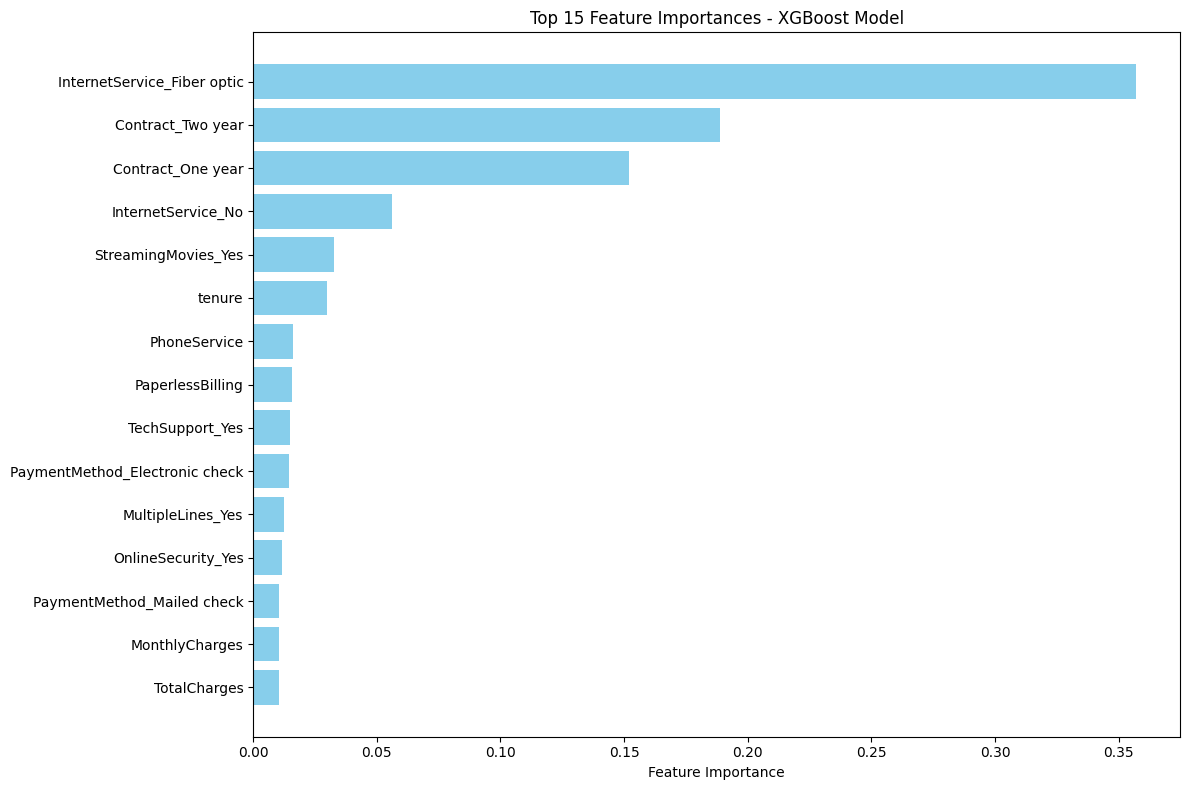


Model training and evaluation completed successfully!

Confusion Matrix Visualization:


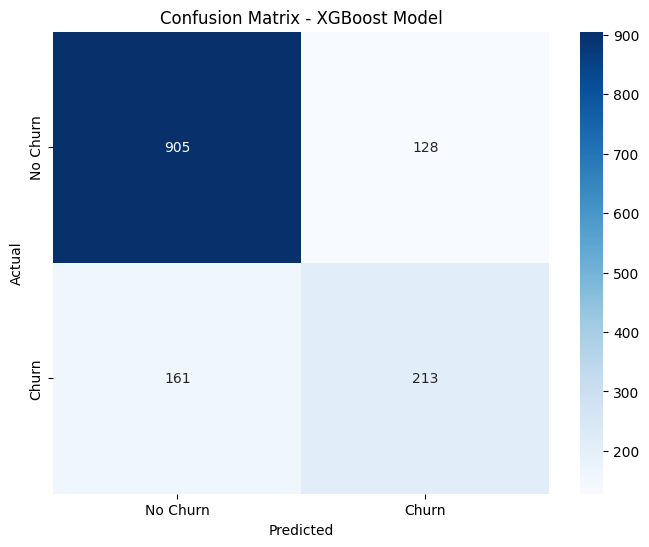

In [14]:

# Train XGBoost model
print("Training XGBoost model...")
xgb_model = xgb.XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    max_depth=6,
    learning_rate=0.1,
    n_estimators=100
)

xgb_model.fit(X_train, y_train)
print("XGBoost model training completed!")
print()
# Make predictions
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 15 Most Important Features:")
print(feature_importance.head(15))

# Plot feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'], color='skyblue')
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 15 Feature Importances - XGBoost Model')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nModel training and evaluation completed successfully!") 

# Print confusion matrix for XGBoost model
print("\nConfusion Matrix Visualization:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], 
            yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix - XGBoost Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Random Forest

Training Random Forest model...
Random Forest model training completed!


Random Forest Model Accuracy: 0.7825

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.78      0.84      1033
           1       0.56      0.80      0.66       374

    accuracy                           0.78      1407
   macro avg       0.74      0.79      0.75      1407
weighted avg       0.82      0.78      0.79      1407


Confusion Matrix:
[[801 232]
 [ 74 300]]

Top 15 Most Important Features (Random Forest):
                                feature  importance
4                                tenure    0.184861
8                          TotalCharges    0.147448
7                        MonthlyCharges    0.098406
26                    Contract_Two year    0.080951
11          InternetService_Fiber optic    0.067630
28       PaymentMethod_Electronic check    0.052435
25                    Contract_One year    0.038432
14                   OnlineSecu

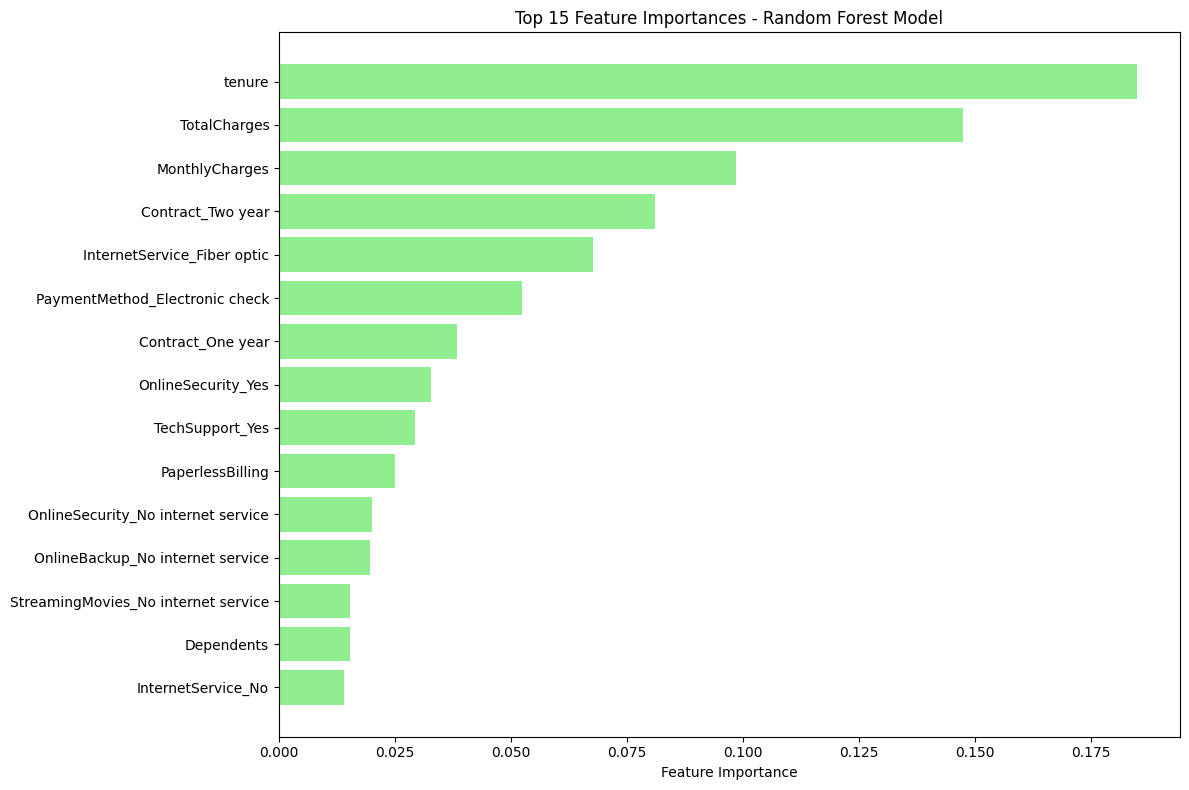


Random Forest model training and evaluation completed successfully!

Random Forest Model - Comprehensive Evaluation:
Accuracy:  0.7825
Precision: 0.5639
Recall:    0.8021
F1-Score:  0.6623
ROC-AUC:   0.8583


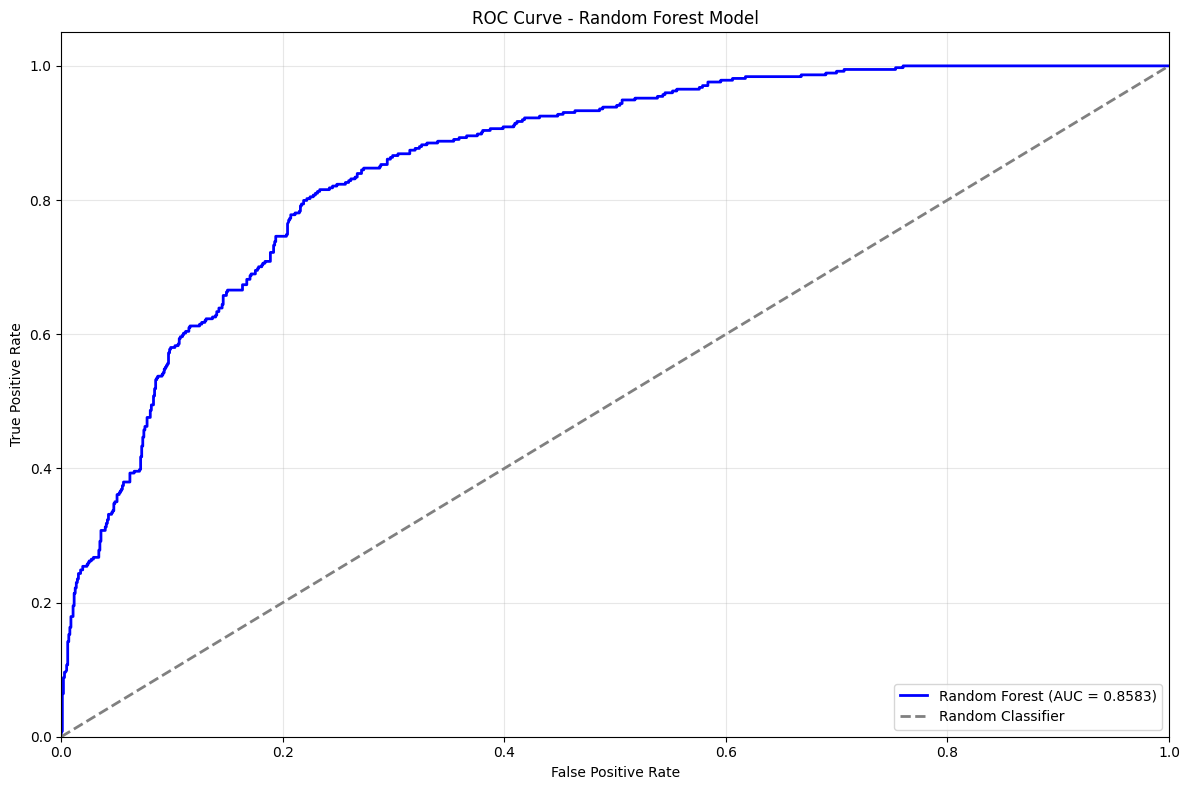


Confusion Matrix Visualization:


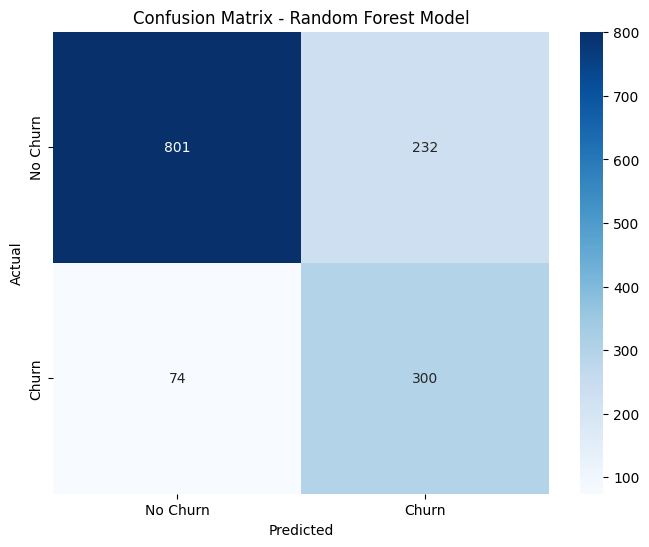

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train Random Forest model
print("Training Random Forest model...")
rf_model = RandomForestClassifier(
    random_state=42,
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced'
)

rf_model.fit(X_train, y_train)
print("Random Forest model training completed!")
print()

# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nRandom Forest Model Accuracy: {accuracy_rf:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Feature importance analysis
feature_importance_rf = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 15 Most Important Features (Random Forest):")
print(feature_importance_rf.head(15))

# Plot feature importance
plt.figure(figsize=(12, 8))
top_features_rf = feature_importance_rf.head(15)
plt.barh(range(len(top_features_rf)), top_features_rf['importance'], color='lightgreen')
plt.yticks(range(len(top_features_rf)), top_features_rf['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 15 Feature Importances - Random Forest Model')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nRandom Forest model training and evaluation completed successfully!")

# Evaluate the Random Forest model with comprehensive metrics
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculate additional metrics for Random Forest
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

print(f"\nRandom Forest Model - Comprehensive Evaluation:")
print(f"Accuracy:  {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall:    {recall_rf:.4f}")
print(f"F1-Score:  {f1_rf:.4f}")
print(f"ROC-AUC:   {roc_auc_rf:.4f}")

# Plot ROC Curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)

plt.figure(figsize=(12, 8))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Model')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print confusion matrix for Random Forest model
print("\nConfusion Matrix Visualization:")
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], 
            yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix - Random Forest Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Logistic regression

Training Logistic Regression Model...
Logistic Regression model training completed!
Logistic Regression Accuracy: 0.8074

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

    No Churn       0.85      0.89      0.87      1033
       Churn       0.66      0.57      0.61       374

    accuracy                           0.81      1407
   macro avg       0.76      0.73      0.74      1407
weighted avg       0.80      0.81      0.80      1407


Logistic Regression Model - Comprehensive Evaluation:
Accuracy:  0.8074
Precision: 0.6585
Recall:    0.5722
F1-Score:  0.6123
ROC-AUC:   0.8526


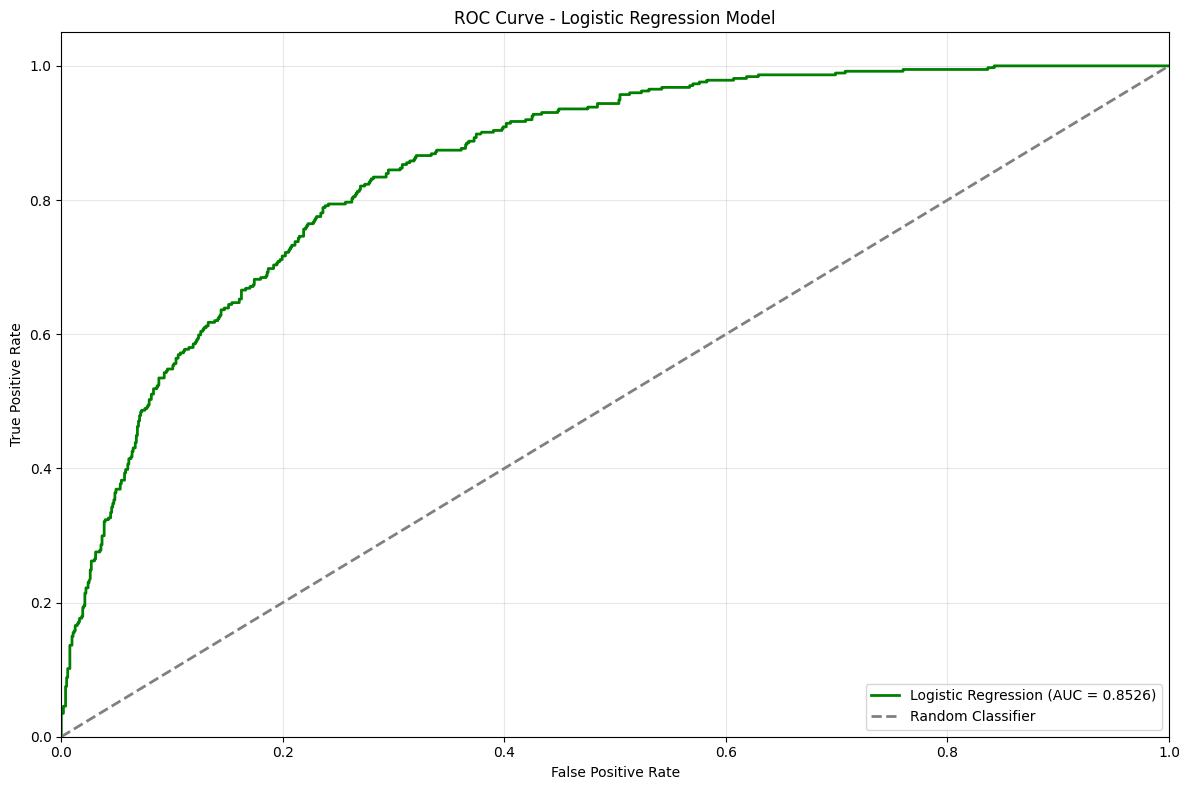


Confusion Matrix Visualization:


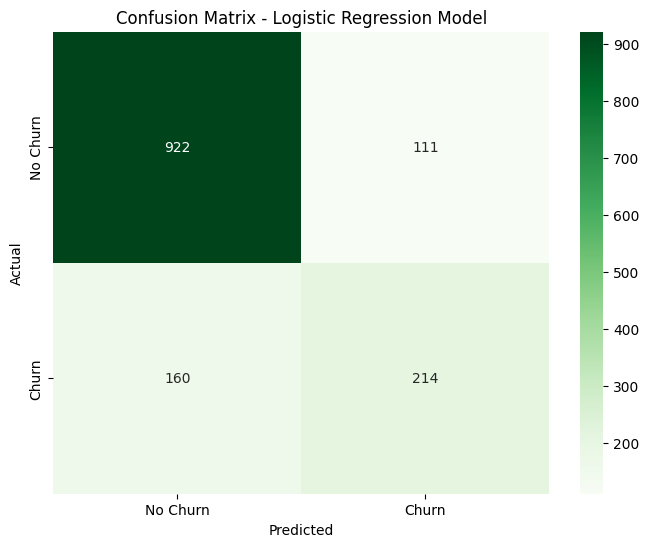

In [15]:
# Implement Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Training Logistic Regression Model...")
print("=" * 50)

# Train Logistic Regression with original dataset
lr_model = LogisticRegression(
    random_state=42,
    max_iter=1000,
    solver='liblinear'
)

lr_model.fit(X_train, y_train)
print("Logistic Regression model training completed!")

# Make predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")

# Print classification report
print("\nLogistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['No Churn', 'Churn']))

# Evaluate the Logistic Regression model with comprehensive metrics
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)

print(f"\nLogistic Regression Model - Comprehensive Evaluation:")
print(f"Accuracy:  {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall:    {recall_lr:.4f}")
print(f"F1-Score:  {f1_lr:.4f}")
print(f"ROC-AUC:   {roc_auc_lr:.4f}")

# Plot ROC Curve for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)

plt.figure(figsize=(12, 8))
plt.plot(fpr_lr, tpr_lr, color='green', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression Model')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print confusion matrix for Logistic Regression model
print("\nConfusion Matrix Visualization:")
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['No Churn', 'Churn'], 
            yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix - Logistic Regression Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Original training set shape: (2333, 68)
Balanced training set shape: (676, 68)
Original class distribution: {0: 1995, 1: 338}
Balanced class distribution: {0: 338, 1: 338}

Random Forest model training with balanced dataset completed!


Random Forest Model Accuracy (Balanced): 0.8660

Classification Report (Balanced):
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       855
           1       0.52      0.84      0.65       145

    accuracy                           0.87      1000
   macro avg       0.75      0.86      0.78      1000
weighted avg       0.91      0.87      0.88      1000


Confusion Matrix (Balanced):
[[744 111]
 [ 23 122]]

Top 15 Most Important Features (Random Forest - Balanced):
           feature  importance
10      Day Charge    0.151547
6   CustServ Calls    0.141824
2         Day Mins    0.130813
7       Int'l Plan    0.078820
12      Eve Charge    0.050601
3         Eve Mins    0.049141
5        Intl Mins    0

/home/dustinvan/WORK/ECE503/Project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  )
/home/dustinvan/WORK/ECE503/Project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  )


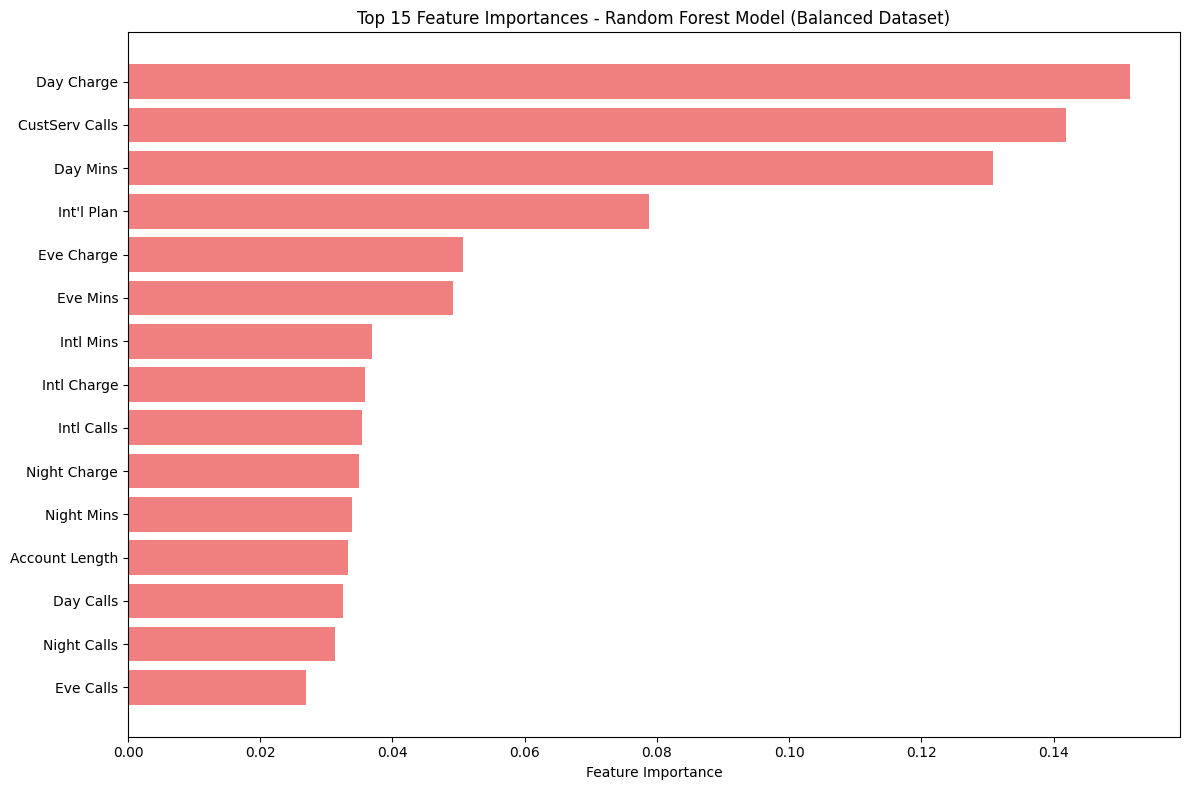


Random Forest model training and evaluation with balanced dataset completed successfully!

Additional Metrics (Random Forest - Balanced):
Precision: 0.5236
Recall: 0.8414
F1-Score: 0.6455


NameError: name 'auc' is not defined

In [107]:
# Handle class imbalance using SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import resample

# Apply Random Under Sampling to balance the dataset using sklearn's resample
# Separate majority and minority classes
df_majority = pd.DataFrame(X_train)[y_train == 0]
df_minority = pd.DataFrame(X_train)[y_train == 1]

# Downsample majority class to match minority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(df_minority),     # to match minority class
                                 random_state=42) # reproducible results

# Combine minority class with downsampled majority class
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Separate features and target
X_train_balanced = df_balanced.values
y_train_balanced = pd.concat([pd.Series([0] * len(df_majority_downsampled)), 
                             pd.Series([1] * len(df_minority))]).values

print(f"Original training set shape: {X_train.shape}")
print(f"Balanced training set shape: {X_train_balanced.shape}")
print(f"Original class distribution: {y_train.value_counts().to_dict()}")
print(f"Balanced class distribution: {pd.Series(y_train_balanced).value_counts().to_dict()}")
print()

# Train Random Forest with balanced dataset
rf_balanced = RandomForestClassifier(
    random_state=42,
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2
)

rf_balanced.fit(X_train_balanced, y_train_balanced)
print("Random Forest model training with balanced dataset completed!")
print()

# Make predictions
y_pred_rf_balanced = rf_balanced.predict(X_test)
y_pred_proba_rf_balanced = rf_balanced.predict_proba(X_test)[:, 1]

# Evaluate the balanced model
accuracy_rf_balanced = accuracy_score(y_test, y_pred_rf_balanced)
print(f"\nRandom Forest Model Accuracy (Balanced): {accuracy_rf_balanced:.4f}")
print("\nClassification Report (Balanced):")
print(classification_report(y_test, y_pred_rf_balanced))
print("\nConfusion Matrix (Balanced):")
print(confusion_matrix(y_test, y_pred_rf_balanced))

# Feature importance analysis for balanced model
feature_importance_rf_balanced = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_balanced.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 15 Most Important Features (Random Forest - Balanced):")
print(feature_importance_rf_balanced.head(15))

# Plot feature importance for balanced model
plt.figure(figsize=(12, 8))
top_features_rf_balanced = feature_importance_rf_balanced.head(15)
plt.barh(range(len(top_features_rf_balanced)), top_features_rf_balanced['importance'], color='lightcoral')
plt.yticks(range(len(top_features_rf_balanced)), top_features_rf_balanced['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 15 Feature Importances - Random Forest Model (Balanced Dataset)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nRandom Forest model training and evaluation with balanced dataset completed successfully!")

# Additional metrics for balanced model
precision_rf_balanced = precision_score(y_test, y_pred_rf_balanced)
recall_rf_balanced = recall_score(y_test, y_pred_rf_balanced)
f1_rf_balanced = f1_score(y_test, y_pred_rf_balanced)

print(f"\nAdditional Metrics (Random Forest - Balanced):")
print(f"Precision: {precision_rf_balanced:.4f}")
print(f"Recall: {recall_rf_balanced:.4f}")
print(f"F1-Score: {f1_rf_balanced:.4f}")

# ROC Curve and AUC for balanced model
fpr_rf_balanced, tpr_rf_balanced, _ = roc_curve(y_test, y_pred_proba_rf_balanced)
auc_rf_balanced = auc(fpr_rf_balanced, tpr_rf_balanced)

plt.figure(figsize=(12, 8))
plt.plot(fpr_rf_balanced, tpr_rf_balanced, color='lightcoral', lw=2, 
         label=f'Random Forest (Balanced) ROC curve (AUC = {auc_rf_balanced:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Model (Balanced Dataset)')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nAUC Score (Random Forest - Balanced): {auc_rf_balanced:.4f}")
